# Саркисян Артем НММбд-01-22

### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
ad = pd.read_csv('2008.csv')
ad.tail(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0
69999,2008,12,6,6,859.0,900,959.0,1005,WN,510,...,2.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


**1.** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [3]:
CancellationCode_list = ad['CancellationCode'].value_counts()
print(CancellationCode_list)


CancellationCode
A    563
B    549
C    299
Name: count, dtype: int64


**2.** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [4]:
print('Среднее расстояние:', ad['Distance'].mean())
print('Минимальное расстояние:', ad['Distance'].min())
print('Максимальное расстояние:', ad['Distance'].max())
print('расстояния указаны в милях')

Среднее расстояние: 724.5082571428571
Минимальное расстояние: 31
Максимальное расстояние: 4962
расстояния указаны в милях


**3.** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

Минимально пройденое расстоение было в следующие дни:

In [5]:
# days
ad[(ad['Distance'] == 31)][['Year', 'Month', 'DayofMonth']]

,Year,Month,DayofMonth
1116,2008,12,30
6958,2008,12,26
17349,2008,8,18
27534,2008,3,11
46082,2008,8,9
48112,2008,2,28


Минимальное расстояние было пройдено рейсами 64 и 65.

In [6]:
# FlightNum
print(ad[(ad['Distance'] == 31)]['FlightNum'].unique())

[65 64]


В другие дни рейс 64 прошлёл следующие расстояния:

In [7]:
print(ad[(ad['Distance'] != 31) &
   (ad['FlightNum'] == 64)]['Distance'].unique())

[ 533  680 2381   82 1005  123  359 1747  372  883  571  414]


В другие дни рейс 65 прошлёл следующие расстояния:

In [8]:
print(ad[(ad['Distance'] != 31) &
   (ad['FlightNum'] == 65)]['Distance'].unique())

[ 680   82  571 2454 1005  581 1747  123  281  682  372  386]


**4.** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [9]:
Origin_list = ad['Origin'].value_counts()
print(Origin_list.head(5))

Origin
ATL    4134
ORD    3550
DFW    2793
DEN    2383
LAX    2082
Name: count, dtype: int64


Больше всего вылетов было из аэропорта ATL Хартсфилд-Джексон город Атланта.

**5.** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [10]:
ad.groupby('Origin')['AirTime'].mean()

Origin
ABE    88.266667
ABI    36.400000
ABQ    93.454321
ABY    35.714286
ACK    50.800000
         ...    
WRG    18.000000
XNA    85.945736
YAK    35.900000
YKM    79.000000
YUM    47.470588
Name: AirTime, Length: 297, dtype: float64

Наибольшее среднее время полёта у аэропорта ABE(Международный аэропорт Лихай-Вэлли).

**6.** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [11]:
pd.options.mode.chained_assignment = None
grouped_data = ad.groupby('Origin').agg(total_flights=('DepDelay', 'count'), delayed_flights=('DepDelay', lambda x: (x > 0).sum()))
filtered_grouped_data = grouped_data[grouped_data['total_flights'] >= 1000]
filtered_grouped_data['delay_ratio'] = filtered_grouped_data['delayed_flights'] / filtered_grouped_data['total_flights']
airport_with_highest_delay_ratio = filtered_grouped_data['delay_ratio'].idxmax()
print("Аэропорт с наибольшей долей задержек:", airport_with_highest_delay_ratio)


Аэропорт с наибольшей долей задержек: EWR


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**7.** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [12]:
df = pd.read_csv('2008.csv')

Проверили наличие пропущенных значений в данных

In [13]:
has_missing_values = df.isnull().values.any()

if has_missing_values:
    print("есть пропущенные значения.")
else:
    print("нет пропущенных значений.")

есть пропущенные значения.


Посчитали общее количество пропущенных элементов в таблице "объект-признак"

In [14]:
total_missing_elements = df.isnull().sum().sum()
print("Общее количество пропущенных элементов в таблице 'объект-признак':", total_missing_elements)

Общее количество пропущенных элементов в таблице 'объект-признак': 355215


Посчитали количество объектов, имеющих хотя бы один пропуск

In [15]:
objects = df[df.isnull().any(axis=1)].shape[0]
print("Количество объектов, имеющих хотя бы один пропуск:", objects)

Количество объектов, имеющих хотя бы один пропуск: 70000


Посчитали количество признаков, имеющих хотя бы одно пропущенное значение

In [16]:
priznack = df.columns[df.isnull().any()].shape[0]
print("Количество признаков, имеющих хотя бы одно пропущенное значение:", priznack)

Количество признаков, имеющих хотя бы одно пропущенное значение: 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [17]:
values = df['DepDelay'].isnull().values.any()

if values:
    print("В целевой переменной есть пропущенные значения.")
else:
    print("В целевой переменной нет пропущенных значений.")
objects_target = df[df['DepDelay'].isnull()]
print("Объекты с пропущенными значениями целевой переменной:")
print(objects_target)


В целевой переменной есть пропущенные значения.
Объекты с пропущенными значениями целевой переменной:
       Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
11     2008      3           6          4      NaN        1605      NaN   
78     2008      1          19          6      NaN         750      NaN   
103    2008      7          24          4      NaN        1230      NaN   
112    2008      2           4          1      NaN         620      NaN   
128    2008      1          21          1      NaN        1838      NaN   
...     ...    ...         ...        ...      ...         ...      ...   
69818  2008      6           9          1      NaN        1645      NaN   
69836  2008      1          25          5      NaN         938      NaN   
69884  2008     12          26          5      NaN        1935      NaN   
69918  2008      3           1          6      NaN         600      NaN   
69949  2008      1          21          1      NaN        1630      NaN  

In [31]:
df_cleaned = df.dropna(subset=['DepDelay']).loc[df['DepDelay'] != 0]

df_cleaned = df_cleaned.drop(['DepTime', 'ArrTime'], axis=1)

target = df_cleaned['DepDelay']
data = df_cleaned.drop('DepDelay', axis=1) 

print("Размер очищенной выборки:", df_cleaned.shape)
print("Размер целевой переменной:", target.shape)
print("Размер матрицы 'объект-признак' после удаления целевой переменной и признаков:", data.shape)

Размер очищенной выборки: (63404, 27)
Размер целевой переменной: (63404,)
Размер матрицы 'объект-признак' после удаления целевой переменной и признаков: (63404, 26)


**8.** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [ ]:
def split_time(df, feature_name):
    df[feature_name + '_Hour'] = df[feature_name] // 100
    df[feature_name + '_Minute'] = df[feature_name] % 100
    df = df.drop(feature_name, axis=1)
    return df

**9.** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [36]:
data = data.drop(['Year', 'TailNum', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1)
data

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,6,18,3,2055,2300,WN,242,57.0,65.0,46.0,MDW,CLE,307,3.0,8.0,0,NaN,0
1,6,4,3,1410,1728,XE,2380,124.0,138.0,108.0,IAH,AVL,834,4.0,12.0,0,NaN,0
2,8,3,7,1145,1520,WN,1769,138.0,155.0,125.0,MDW,TPA,997,4.0,9.0,0,NaN,0
3,1,23,3,1144,1335,OO,3802,102.0,111.0,79.0,SLC,FCA,532,4.0,19.0,0,NaN,0
4,5,4,7,820,1300,WN,399,148.0,160.0,136.0,LAS,AUS,1090,4.0,8.0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1,26,6,925,1118,OH,5218,110.0,113.0,85.0,CVG,BDL,661,12.0,13.0,0,NaN,0
69995,5,12,1,1840,2149,DL,794,128.0,129.0,86.0,ORD,ATL,606,22.0,20.0,0,NaN,0
69996,5,11,7,1125,1314,OO,6159,47.0,49.0,30.0,ORD,GRR,137,4.0,13.0,0,NaN,0
69998,2,18,1,1900,2139,NW,641,234.0,219.0,192.0,RSW,MSP,1416,20.0,22.0,0,NaN,0


**10.** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [37]:
data['DepTime_Hour'].hist(bins=20)

KeyError: 'DepTime_Hour'

<Axes: >

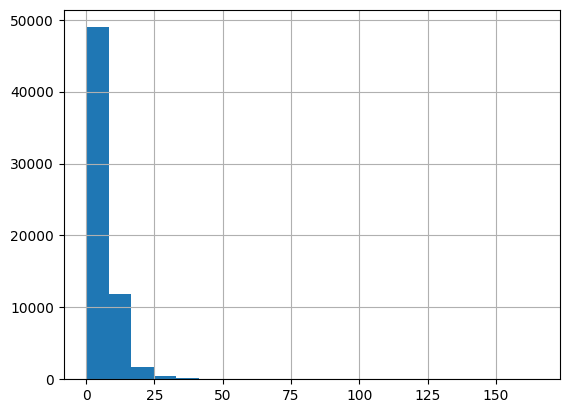

In [33]:
data['TaxiIn'].hist(bins=20)

<Axes: >

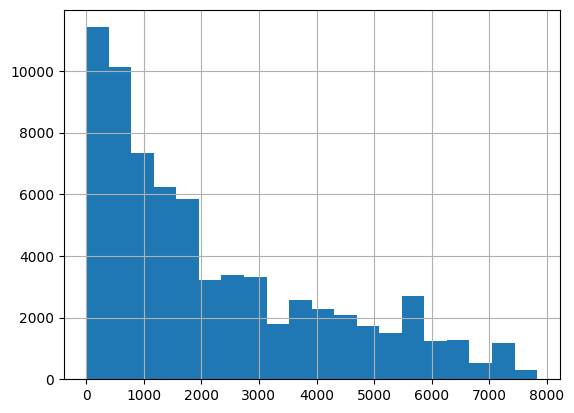

In [34]:
df['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [ ]:
from sklearn.preprocessing import StandardScaler


def transform_data(ad):
    real = ad.select_dtypes(include=['int64', 'float64'])
    realcol = real.columns
    cat = ad.select_dtypes(include='object')
    
    real = real.fillna(0)
    
    scaler = StandardScaler()
    scaler.fit(real)
    real = scaler.transform(real)

    cat = pd.get_dummies(cat)

    data = pd.DataFrame(real, columns=realcol)
    cat = cat.reset_index(drop=True)
    data = pd.concat([data, cat], axis=1)
    return ad

data = transform_data(ad)
data

**11.** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12.** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Обучение модели на 1000 объектах из обучающей выборки
linear_regression = LinearRegression()
linear_regression.fit(X_train[:1000], y_train[:1000])

# Прогнозирование на обучающей подвыборке
y_train_predicted = linear_regression.predict(X_train[:1000])
mse_train = mean_squared_error(y_train[:1000], y_train_predicted)
r2_train = r2_score(y_train[:1000], y_train_predicted)

# Прогнозирование на контрольной выборке
y_test_predicted = linear_regression.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_predicted)
r2_test = r2_score(y_test, y_test_predicted)

# Вывод результатов
print("MSE на обучающей выборке:", mse_train)
print("R^2 на обучающей выборке:", r2_train)
print("MSE на контрольной выборке:", mse_test)
print("R^2 на контрольной выборке:", r2_test)# Your code here

**13.** Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
num_nonzero_weights = []
for alpha_val in np.logspace(-3, 3):
    lasso_model = Lasso(alpha=alpha_val)
    lasso_model.fit(X_train[:1000], y_train[:1000])
    count = 0
    for weight in lasso_model.coef_:
        if abs(weight) >= 1e-8:
            count += 1
    num_nonzero_weights.append(count)
plt.plot(np.logspace(-3, 3), num_nonzero_weights)
plt.xscale('log')
plt.xlabel('Regularization Coefficient')
plt.ylabel('Number of Non-zero Weights')
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

from sklearn.metrics import mean_squared_error as calculate_rmse
from sklearn.metrics import mean_absolute_error as calculate_mae
from sklearn.metrics import r2_score as calculate_r2

num_nonzero_weights = []
rmse_values = []
mae_values = []
r2_values = []
n = []

for alpha_val in np.logspace(-3, 3):
    ridge_model = Ridge(alpha=alpha_val)
    ridge_model.fit(X_train[:1000], y_train[:1000])
    
    count = 0
    for weight in ridge_model.coef_:
        if abs(weight) >= 1e-8:
            count += 1
    num_nonzero_weights.append(count)
    
    predictions = ridge_model.predict(X_test)
    rmse = calculate_rmse(y_test, predictions)
    mae = calculate_mae(y_test, predictions)
    r2 = calculate_r2(y_test, predictions)
    
    n.append(count)
    rmse_values.append(rmse)
    mae_values.append(mae)
    r2_values.append(r2)

Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [ ]:
# Your code here
# ...

**14.** Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?